<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

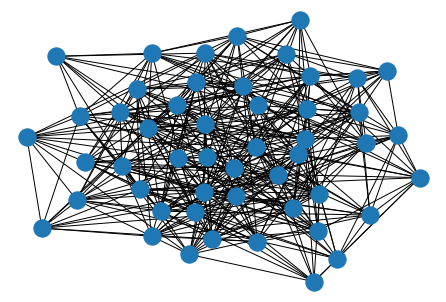

In [1]:
#Erdos-Renyi Graph in Networkx
import numpy as np
from statistics import mean
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities
NUM_TESTS  = K/5 #Number of test available
NUM_VACS   = K/5 #Number of vaccines available
PAS = 0.2 #Probability of Asymptomatic
PS = 1 - PAS #Probability of Not Asymptomatic(i.e. Symptomatic)


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
#A = nx.adjacency_matrix(Graph)
#Adjacency_matrix = A.todense()
#AN = nx.adjacency_matrix(GraphN)
#Adjacency_matrixN = AN.todense()
#print(Adjacency_matrix)
#print(Adjacency_matrixN)

In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
print(Node)
print(len(Node))


{}
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [], 54: [], 55: [], 56: [], 57: [], 58: [], 59: [], 60: [], 61: [], 62: [], 63: [], 64: [], 65: [], 66: [], 67: [], 68: [], 69: [], 70: [], 71: [], 72: [], 73: [], 74: [], 75: [], 76: [], 77: [], 78: [], 79: [], 80: [], 81: [], 82: [], 83: [], 84: [], 85: [], 86: [], 87: [], 88: [], 89: [], 90: [], 91: [], 92: [], 93: [], 94: [], 95: [], 96: [], 97: [], 98: [], 99: [], 100: [], 101: [], 102: [], 103: [], 104: [], 105: [], 106: [], 107: [], 108: [], 109: [], 110: [], 111: [], 112: [], 113: [], 114: [], 115: [], 116: [], 117: [], 118: [], 119: [], 120: [], 121: [], 122: [],

In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
    #Node[i*NN+j].append({'ISOLATED_S' : 0})
    Node[i*NN+j].append({'ISOLATED_I' : 0})   
print(Node)
print(len(Node))


{0: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}], 1: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}], 2: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}], 3: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}], 4: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}], 5: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}], 6: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}], 7: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}], 8: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}], 9: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}], 10: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}], 11: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}], 12: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}], 13: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R

In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(95,5),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1

  Symptom = random.choices([0,1],weights=(PAS,PS), k=1)[0]
  Isolate = 0

  Agent[k].append({'Symptom' : Symptom, 'Isolate' : Isolate})
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,0,0]})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,Symptom,Isolate], 'C' : 0})
    Agent[k].append({'State' : Rand_state, 'C' : 0 })

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
print(Node)
print(Agent)

{0: [{'Viral_load': 0}, {'S': 10}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}, {284: [0, 0, 0]}, {351: [0, 0, 0]}, {695: [0, 0, 0]}, {1007: [0, 0, 0]}, {3217: [0, 0, 0]}, {4481: [0, 0, 0]}, {5298: [0, 0, 0]}, {5350: [0, 0, 0]}, {5533: [0, 0, 0]}, {6992: [0, 0, 0]}], 1: [{'Viral_load': 0}, {'S': 7}, {'I': 2}, {'R': 0}, {'ISOLATED_I': 0}, {508: [0, 0, 0]}, {1035: [0, 0, 0]}, {5280: [0, 0, 0]}, {5728: [0, 0, 0]}, {6364: [1, 1, 0], 'C': 0}, {6497: [1, 1, 0], 'C': 0}, {7282: [0, 0, 0]}, {8060: [0, 0, 0]}, {9890: [0, 0, 0]}], 2: [{'Viral_load': 0}, {'S': 6}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}, {456: [0, 0, 0]}, {5344: [0, 0, 0]}, {6171: [0, 0, 0]}, {8426: [0, 0, 0]}, {8704: [0, 0, 0]}, {9376: [0, 0, 0]}], 3: [{'Viral_load': 0}, {'S': 5}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}, {263: [0, 0, 0]}, {311: [0, 0, 0]}, {5445: [0, 0, 0]}, {5561: [0, 0, 0]}, {7542: [0, 0, 0]}], 4: [{'Viral_load': 0}, {'S': 3}, {'I': 0}, {'R': 0}, {'ISOLATED_I': 0}, {2829: [0, 0, 0]}, {8660: [0, 0, 0]}, {9019: [0, 0, 0]}

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1, num_tests=K,num_vacs=K):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
        #Node_next[i*len(GraphN.nodes)+j].append({'ISOLATED_S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'ISOLATED_I' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(5,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][2]['Home_node'])
                  neighbors.append(Agent_next[a_id][4]['First_node'])
                  neighbors.append(Agent_next[a_id][6]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][5]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][5]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][7]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][7]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][3]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][3]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][5]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][7]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][3]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      if max(P1,P2,PH) == PH:
                        PH = 3*PH
                        P1 = P1/3
                        P2 = P2/3
                      elif max(P1,P2,PH) == P1:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      else:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      #next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      next = random.choices(neighbors,weights=(.95,.025,.025), k=1)[0]
                      if next == Agent_next[a_id][8]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][4]['First_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][4]['First_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][5]['First_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][5]['First_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][5]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][6]['Second_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][6]['Second_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][7]['Second_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][7]['Second_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][7]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][2]['Home_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][2]['Home_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][3]['Home_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][3]['Home_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][3]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      if max(P1,P2,P3) == P1:
                        P1 = 3*P1
                        P2 = P2
                        P3 = P3
                      elif max(P1,P2,P3) == P2:
                        P1 = 3*P1
                        P2 = 2*P2
                        P3 = P1
                      else:
                        P1 = 3*P1
                        P2 = P2
                        P3 = 2*P3
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      #nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      nextn = random.choices(Agent_next[a_id][9]['Current_nodeN'],weights=(.90,.05,.05),k=1)[0]                    
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id][0] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id][0] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['C']+=1
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id][0] == 2:
            Node_next[nex][3]['R']+=1

          if num_vacs > 0:
            #if nex != cur: #vacinate in case of movements
            if Node_next[nex][-1][a_id][0] != 2:
              num_vacs = num_vacs - 1
              if Node_next[nex][-1][a_id][0] == 1:
                Node_next[nex][3]['R']+=1
                Node_next[nex][2]['I']-=1
              else:
                Node_next[nex][3]['R']+=1
                Node_next[nex][1]['S']-=1
              Node_next[nex][-1][a_id][0] = 2

          #if Node[cur][agent][a_id][2] == 1:
          #  if Node[cur][agent][a_id][0] == 1:
          #    Node_next[nex][4]['ISOLATED_I']+=1

          
          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        Total = Node_next[i*len(GraphN.nodes)+j][1]['S']  + Node_next[i*len(GraphN.nodes)+j][2]['I'] - Node_next[i*len(GraphN.nodes)+j][4]['ISOLATED_I'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] + 1
        W1 = (Node_next[i*len(GraphN.nodes)+j][2]['I'] - Node_next[i*len(GraphN.nodes)+j][4]['ISOLATED_I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load'])/Total
        W2 = (Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1)/Total
        for agent in list(range(5,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'C' : 0})
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][1] = random.choices([0,1],weights=(PAS,PS), k=1)[0]
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] = 0
              Agent_next[a_id][1]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] != 1:
              if Node_next[i*len(GraphN.nodes)+j][agent]['C'] == 4:  #Time-steps of 4 to get cured(I -> R)
                Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = 2
                count_IR+=1
                Agent_next[a_id][1]['State'] = 2
                Node_next[i*len(GraphN.nodes)+j][agent].pop('C') 
            elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] == 1:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = 2
              count_IR+=1
              Agent_next[a_id][1]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('C')

        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 

    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        agents=list(range(5,len(Node_next[i*len(GraphN.nodes)+j])))
        for agent in agents:
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if num_tests > 0:
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][1] == 1:
              num_tests=num_tests - 1  
              if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
                num_tests=num_tests + 1 
                for agent in agents:
                  a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
                  num_tests=num_tests - 1
                  if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
                    Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = 2
                    Node_next[i*len(GraphN.nodes)+j][agent].pop('C') 
                    Node_next[i*len(GraphN.nodes)+j][3]['R']+=1
                    Node_next[i*len(GraphN.nodes)+j][2]['I']-=1
                    #if Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] == 0:
                    #  Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] = 1
                break 
            

            #elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][1] == 0:
            #  p = random.choices([0,1],weights=(PAS,PS), k=1)[0]
            #  if p == 0:
            #    num_tests=num_tests - 1
            #    if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
            #      if Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] == 0:
            #        Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] = 1




    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next,num_tests,num_vacs

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  #count_ISOLATED_S=0
  count_ISOLATED_I=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    #count_ISOLATED_S+=Node[i][4]['ISOLATED_S']
    count_ISOLATED_I+=Node[i][4]['ISOLATED_I']
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,count_ISOLATED_I,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][1]['State'] == 0:
      count_S+=1
    elif Agent[i][1]['State'] == 1:
      count_I+=1
    elif Agent[i][1]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9460, 7129, 6972, 6748, 6459, 6133, 5654, 5108, 4454, 4017, 3541, 3062, 2557, 2073, 1668, 1337, 1110, 931, 779, 665, 568, 504, 455, 442, 436, 432, 428, 422, 416, 412, 412, 411, 411, 409, 409, 409, 409, 409]
[540, 152, 309, 533, 735, 996, 1318, 1640, 1141, 1370, 1570, 1744, 1897, 1944, 1873, 1176, 1028, 888, 782, 672, 542, 427, 180, 124, 75, 40, 27, 20, 20, 4, 3, 2, 2, 3, 3, 2, 1, 0]
[0, 2719, 2719, 2719, 2806, 2871, 3028, 3252, 4405, 4613, 4889, 5194, 5546, 5983, 6459, 7487, 7862, 8181, 8439, 8663, 8890, 9069, 9365, 9434, 9489, 9528, 9545, 9558, 9564, 9584, 9585, 9587, 9587, 9588, 9588, 9589, 9590, 9591]
[0.0, 72.0, 88.0, 132.0, 208.0, 318.0, 432.0, 582.0, 738.0, 687.0, 695.5, 778.75, 884.375, 1001.1875, 1021.59375, 996.796875, 824.3984375, 690.19921875, 585.099609375, 508.5498046875, 426.27490234375, 349.137451171875, 282.5687255859375, 187.28436279296875, 125.64218139648438, 78.82109069824219, 50.410545349121094, 27.205272674560547, 16.602636337280273, 12.301318168640137, 8.15065908

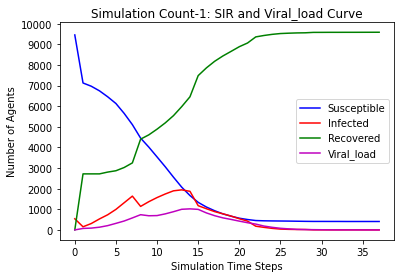

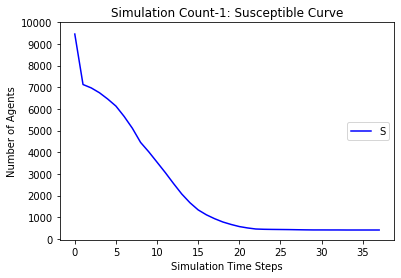

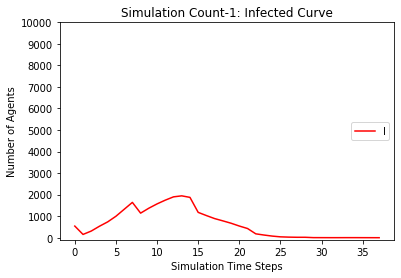

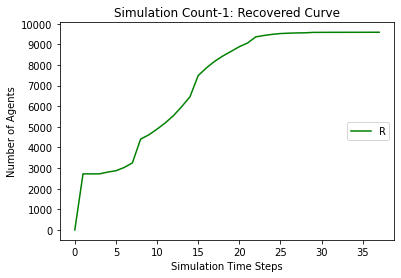

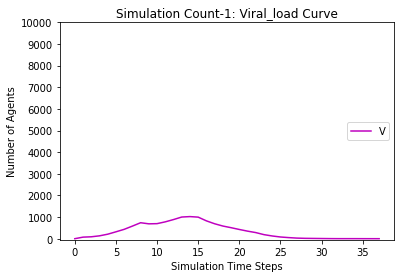

[9460, 7146, 7025, 6850, 6625, 6359, 5988, 5525, 4940, 4569, 4148, 3684, 3165, 2640, 2147, 1696, 1449, 1243, 1065, 936, 822, 744, 672, 648, 617, 602, 585, 567, 551, 545, 542, 540, 537, 531, 529, 527, 526, 526, 526, 526]
[540, 131, 252, 427, 575, 787, 1037, 1325, 898, 1094, 1313, 1541, 1775, 1929, 2001, 1389, 1261, 1096, 931, 760, 627, 499, 210, 146, 127, 106, 87, 81, 66, 21, 19, 14, 10, 14, 13, 13, 0, 0, 0, 0]
[0, 2723, 2723, 2723, 2800, 2854, 2975, 3150, 4162, 4337, 4539, 4775, 5060, 5431, 5852, 6915, 7290, 7661, 8004, 8304, 8551, 8757, 9118, 9206, 9256, 9292, 9328, 9352, 9383, 9434, 9439, 9446, 9453, 9455, 9458, 9460, 9474, 9474, 9474, 9474]
[0.0, 76.0, 71.0, 114.5, 183.25, 256.625, 369.3125, 479.65625, 620.828125, 565.4140625, 592.70703125, 662.353515625, 753.1767578125, 860.58837890625, 956.294189453125, 1008.1470947265625, 882.0735473632812, 784.0367736816406, 679.0183868408203, 593.5091934204102, 507.7545967102051, 415.87729835510254, 337.93864917755127, 230.96932458877563, 163.4

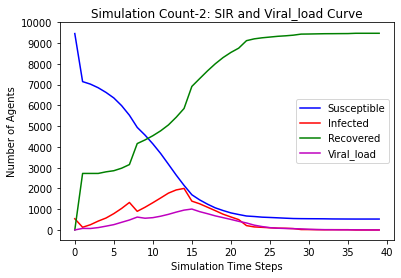

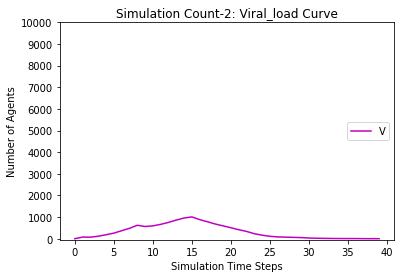

[9460, 7123, 6965, 6743, 6470, 6103, 5658, 5130, 4531, 4150, 3709, 3234, 2749, 2252, 1805, 1434, 1216, 1032, 888, 768, 686, 620, 560, 538, 516, 497, 483, 471, 462, 459, 459, 458, 457, 457, 457, 457, 457]
[540, 134, 292, 514, 709, 1020, 1307, 1613, 1079, 1223, 1411, 1604, 1782, 1898, 1904, 1273, 1146, 960, 797, 666, 530, 412, 199, 140, 109, 87, 77, 67, 54, 12, 6, 3, 2, 2, 2, 1, 0]
[0, 2743, 2743, 2743, 2821, 2877, 3035, 3257, 4390, 4627, 4880, 5162, 5469, 5850, 6291, 7293, 7638, 8008, 8315, 8566, 8784, 8968, 9241, 9322, 9375, 9416, 9440, 9462, 9484, 9529, 9535, 9539, 9541, 9541, 9541, 9542, 9543]
[0.0, 93.0, 77.5, 112.75, 197.375, 293.6875, 436.84375, 583.421875, 780.7109375, 675.35546875, 697.677734375, 728.8388671875, 811.41943359375, 890.709716796875, 957.3548583984375, 995.6774291992188, 847.8387145996094, 713.9193572998047, 615.9596786499023, 510.9798393249512, 451.4899196624756, 369.7449598312378, 297.8724799156189, 198.93623995780945, 139.46811997890472, 92.73405998945236, 71.367

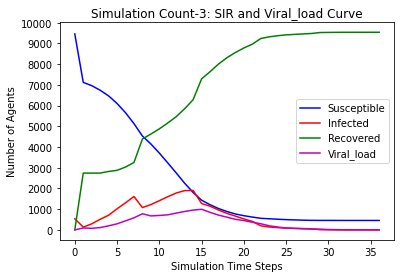

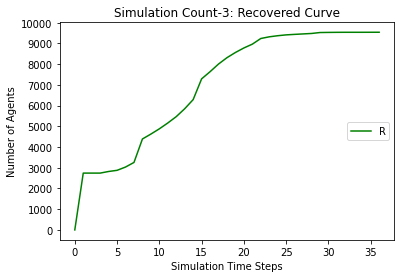

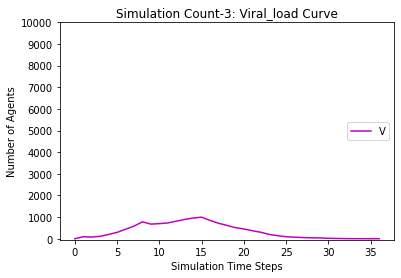

[9460, 7106, 6968, 6738, 6466, 6178, 5791, 5315, 4765, 4399, 3954, 3476, 2968, 2467, 1996, 1576, 1370, 1182, 1029, 901, 800, 710, 643, 614, 591, 577, 567, 552, 544, 537, 532, 530, 528, 526, 523, 521, 519, 519, 519, 516, 513, 513, 512, 510, 510, 510]
[540, 143, 281, 511, 703, 928, 1177, 1423, 916, 1116, 1335, 1569, 1797, 1932, 1958, 1355, 1176, 991, 826, 675, 570, 472, 226, 172, 141, 105, 76, 62, 47, 13, 13, 12, 11, 11, 9, 9, 8, 6, 4, 5, 6, 6, 7, 1, 0, 0]
[0, 2751, 2751, 2751, 2831, 2894, 3032, 3262, 4319, 4485, 4711, 4955, 5235, 5601, 6046, 7069, 7454, 7827, 8145, 8424, 8630, 8818, 9131, 9214, 9268, 9318, 9357, 9386, 9409, 9450, 9455, 9458, 9461, 9463, 9468, 9470, 9473, 9475, 9477, 9479, 9481, 9481, 9481, 9489, 9490, 9490]
[0.0, 65.0, 64.5, 109.25, 175.625, 275.8125, 394.90625, 530.453125, 667.2265625, 586.61328125, 608.306640625, 683.1533203125, 758.57666015625, 831.288330078125, 925.6441650390625, 963.8220825195312, 803.9110412597656, 718.9555206298828, 649.4777603149414, 536.7388801

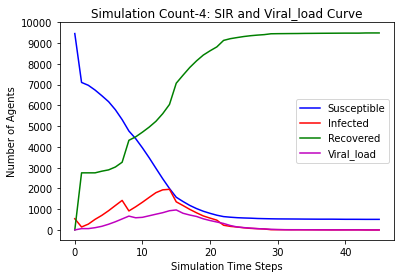

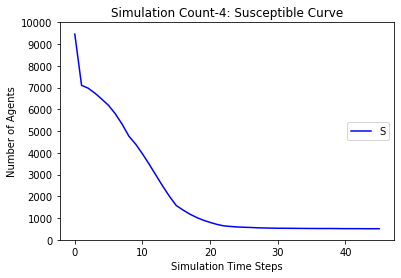

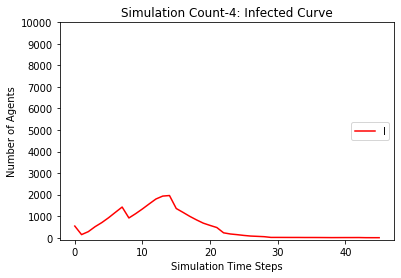

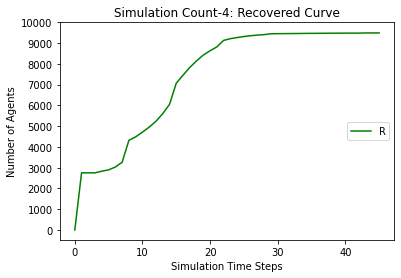

[9460, 7090, 6940, 6744, 6464, 6127, 5679, 5123, 4469, 4035, 3548, 3063, 2560, 2076, 1645, 1280, 1088, 944, 818, 706, 624, 557, 511, 488, 469, 457, 443, 434, 430, 424, 422, 421, 420, 419, 417, 416, 415, 414, 414, 413, 412, 412, 410, 410, 410, 410]
[540, 136, 286, 482, 687, 963, 1261, 1621, 1136, 1349, 1570, 1753, 1909, 1959, 1903, 1192, 1020, 848, 695, 574, 464, 387, 184, 137, 109, 84, 68, 54, 39, 17, 10, 7, 6, 5, 5, 5, 1, 1, 1, 2, 3, 2, 4, 0, 0, 0]
[0, 2774, 2774, 2774, 2849, 2910, 3060, 3256, 4395, 4616, 4882, 5184, 5531, 5965, 6452, 7528, 7892, 8208, 8487, 8720, 8912, 9056, 9305, 9375, 9422, 9459, 9489, 9512, 9531, 9559, 9568, 9572, 9574, 9576, 9578, 9579, 9584, 9585, 9585, 9585, 9585, 9586, 9586, 9590, 9590, 9590]
[0.0, 70.0, 66.0, 103.0, 205.5, 316.75, 471.375, 612.6875, 757.34375, 699.671875, 747.8359375, 790.91796875, 880.458984375, 923.2294921875, 1009.61474609375, 1023.807373046875, 838.9036865234375, 695.4518432617188, 581.7259216308594, 473.8629608154297, 391.93148040771484,

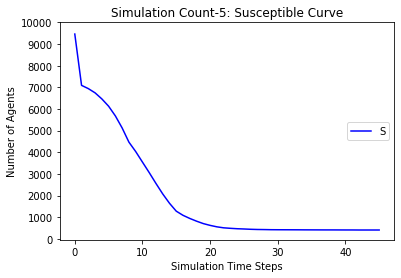

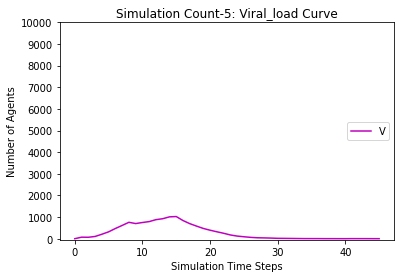

[9460, 7091, 6899, 6627, 6307, 5893, 5344, 4714, 4036, 3601, 3092, 2645, 2168, 1741, 1363, 1059, 904, 796, 714, 666, 624, 586, 558, 546, 538, 526, 515, 510, 504, 496, 494, 493, 492, 491, 490, 490, 490, 489, 489, 489, 488, 488, 487, 485, 483, 482, 481, 480, 480, 480, 480, 480]
[540, 191, 383, 655, 880, 1198, 1555, 1913, 1374, 1546, 1719, 1781, 1868, 1860, 1729, 1119, 919, 712, 529, 393, 280, 210, 70, 53, 38, 41, 43, 36, 34, 14, 11, 9, 6, 5, 4, 3, 2, 2, 1, 1, 2, 1, 2, 1, 3, 4, 5, 5, 3, 2, 1, 0]
[0, 2718, 2718, 2718, 2813, 2909, 3101, 3373, 4590, 4853, 5189, 5574, 5964, 6399, 6908, 7822, 8177, 8492, 8757, 8941, 9096, 9204, 9372, 9401, 9424, 9433, 9442, 9454, 9462, 9490, 9495, 9498, 9502, 9504, 9506, 9507, 9508, 9509, 9510, 9510, 9510, 9511, 9511, 9514, 9514, 9514, 9514, 9515, 9517, 9518, 9519, 9520]
[0.0, 97.0, 97.5, 147.75, 248.875, 384.4375, 528.21875, 717.109375, 910.5546875, 814.27734375, 802.138671875, 832.0693359375, 907.03466796875, 980.517333984375, 977.2586669921875, 932.62933349

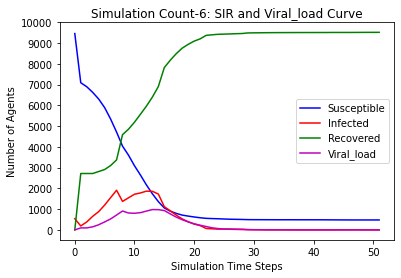

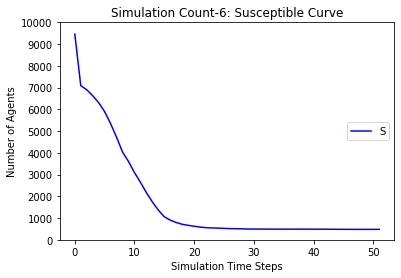

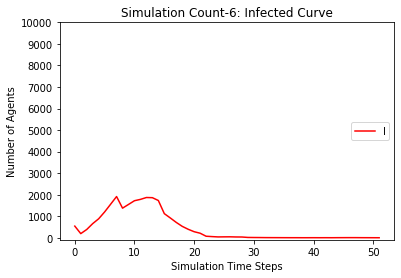

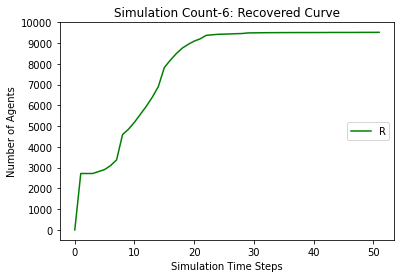

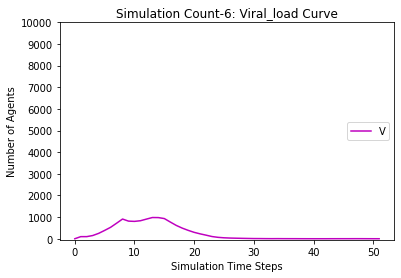

[9460, 7132, 6982, 6758, 6463, 6123, 5706, 5186, 4557, 4157, 3745, 3319, 2823, 2335, 1888, 1493, 1263, 1081, 953, 848, 750, 679, 629, 602, 585, 557, 539, 526, 513, 500, 489, 481, 477, 471, 461, 455, 453, 452, 451, 450, 449, 448, 447, 445, 442, 441, 439, 438, 438, 438, 437, 437, 437]
[540, 154, 304, 528, 746, 1009, 1276, 1572, 1089, 1280, 1442, 1585, 1734, 1822, 1857, 1255, 1122, 977, 798, 645, 513, 402, 163, 121, 86, 91, 90, 76, 72, 12, 22, 28, 28, 29, 28, 26, 11, 10, 7, 4, 4, 4, 4, 3, 6, 7, 8, 7, 4, 3, 0, 0, 0]
[0, 2714, 2714, 2714, 2791, 2868, 3018, 3242, 4354, 4563, 4813, 5096, 5443, 5843, 6255, 7252, 7615, 7942, 8249, 8507, 8737, 8919, 9208, 9277, 9329, 9352, 9371, 9398, 9415, 9488, 9489, 9491, 9495, 9500, 9511, 9519, 9536, 9538, 9542, 9546, 9547, 9548, 9549, 9552, 9552, 9552, 9553, 9555, 9558, 9559, 9563, 9563, 9563]
[0.0, 75.0, 66.5, 103.25, 182.625, 304.3125, 445.15625, 593.578125, 718.7890625, 649.39453125, 667.697265625, 718.8486328125, 793.42431640625, 879.712158203125, 948.8

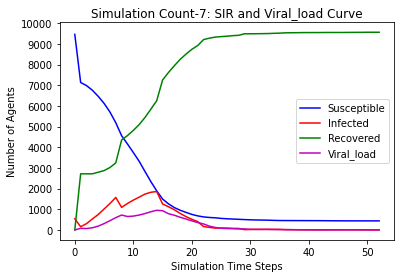

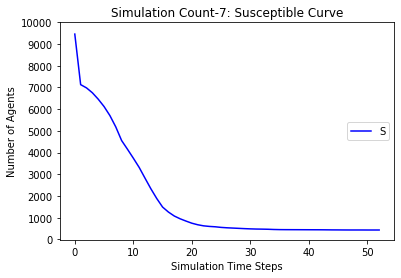

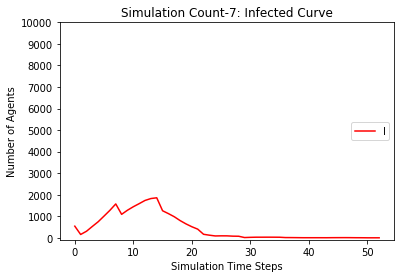

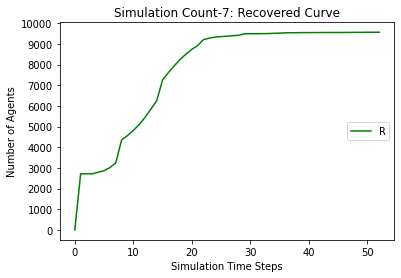

[9460, 7124, 7011, 6842, 6611, 6311, 5936, 5456, 4947, 4577, 4168, 3689, 3216, 2758, 2285, 1831, 1593, 1392, 1225, 1093, 962, 851, 765, 726, 689, 651, 624, 602, 589, 575, 564, 558, 552, 549, 546, 540, 537, 537, 537, 537, 535, 534, 533, 532, 532, 532, 530, 530, 530, 529, 529, 529, 529, 528, 527, 526, 522, 517, 517, 517, 517]
[540, 126, 239, 408, 561, 813, 1075, 1386, 905, 1085, 1294, 1530, 1731, 1819, 1883, 1218, 1103, 983, 861, 738, 631, 541, 256, 209, 171, 151, 141, 124, 100, 49, 40, 33, 29, 26, 18, 18, 8, 7, 5, 2, 2, 3, 4, 1, 1, 1, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 7, 1, 1, 1, 0]
[0, 2750, 2750, 2750, 2828, 2876, 2989, 3158, 4148, 4338, 4538, 4781, 5053, 5423, 5832, 6951, 7304, 7625, 7914, 8169, 8407, 8608, 8979, 9065, 9140, 9198, 9235, 9274, 9311, 9376, 9396, 9409, 9419, 9425, 9436, 9442, 9455, 9456, 9458, 9461, 9463, 9463, 9463, 9467, 9467, 9467, 9467, 9468, 9468, 9468, 9470, 9470, 9470, 9471, 9471, 9471, 9471, 9482, 9482, 9482, 9483]
[0.0, 76.0, 79.0, 102.5, 160.25, 234.125, 348.0625,

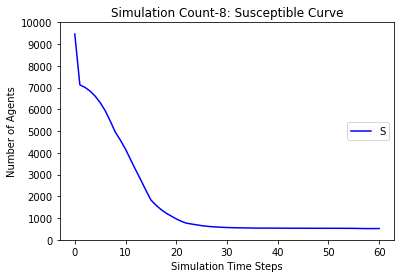

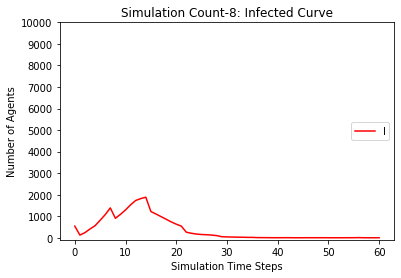

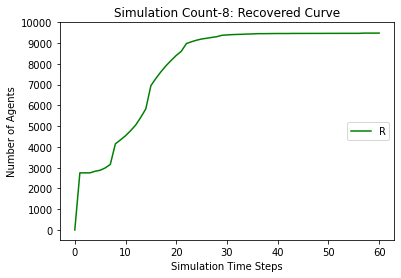

[9460, 7128, 6985, 6797, 6541, 6232, 5824, 5318, 4695, 4286, 3882, 3421, 2943, 2452, 2005, 1599, 1362, 1170, 1026, 891, 794, 704, 632, 591, 567, 551, 539, 536, 526, 520, 520, 518, 517, 516, 513, 511, 511, 511, 511, 511]
[540, 132, 275, 463, 645, 896, 1161, 1479, 1034, 1256, 1407, 1601, 1752, 1834, 1877, 1237, 1123, 986, 835, 708, 568, 466, 248, 195, 160, 121, 93, 55, 41, 11, 7, 9, 5, 4, 7, 7, 1, 1, 1, 0]
[0, 2740, 2740, 2740, 2814, 2872, 3015, 3203, 4271, 4458, 4711, 4978, 5305, 5714, 6118, 7164, 7515, 7844, 8139, 8401, 8638, 8830, 9120, 9214, 9273, 9328, 9368, 9409, 9433, 9469, 9473, 9473, 9478, 9480, 9480, 9482, 9488, 9488, 9488, 9489]
[0.0, 73.0, 74.5, 108.25, 191.125, 284.5625, 384.28125, 534.140625, 684.0703125, 634.03515625, 656.017578125, 733.0087890625, 808.50439453125, 874.252197265625, 946.1260986328125, 991.0630493164062, 823.5315246582031, 713.7657623291016, 617.8828811645508, 525.9414405822754, 460.9707202911377, 395.48536014556885, 339.7426800727844, 231.8713400363922, 16

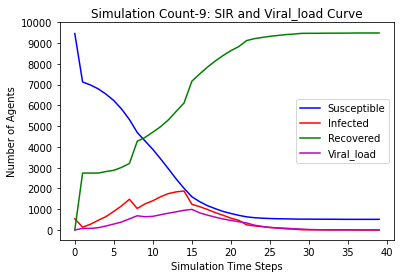

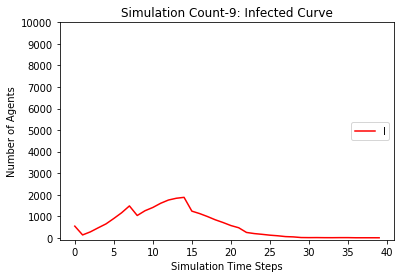

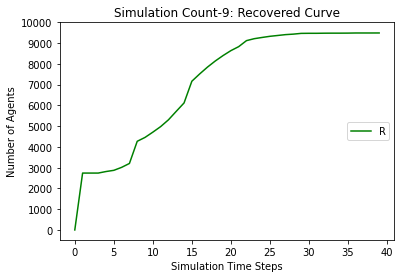

[9460, 7110, 6951, 6758, 6466, 6150, 5721, 5204, 4591, 4199, 3776, 3299, 2858, 2429, 2014, 1643, 1441, 1280, 1136, 1051, 956, 873, 798, 756, 735, 717, 702, 687, 671, 658, 655, 650, 647, 644, 643, 642, 639, 639, 638, 637, 636, 634, 634, 634]
[540, 154, 313, 506, 716, 960, 1230, 1554, 1051, 1242, 1415, 1624, 1733, 1770, 1762, 1107, 982, 838, 727, 592, 485, 407, 178, 170, 143, 118, 96, 69, 64, 31, 25, 20, 17, 14, 12, 8, 1, 1, 1, 2, 3, 5, 4, 0]
[0, 2736, 2736, 2736, 2818, 2890, 3049, 3242, 4358, 4559, 4809, 5077, 5409, 5801, 6224, 7250, 7577, 7882, 8137, 8357, 8559, 8720, 9024, 9074, 9122, 9165, 9202, 9244, 9265, 9311, 9320, 9330, 9336, 9342, 9345, 9350, 9360, 9360, 9361, 9361, 9361, 9361, 9362, 9366]
[0.0, 93.0, 93.5, 124.75, 201.375, 302.6875, 419.34375, 568.671875, 720.3359375, 651.16796875, 680.583984375, 728.2919921875, 803.14599609375, 869.572998046875, 913.7864990234375, 928.8932495117188, 732.4466247558594, 607.2233123779297, 514.6116561889648, 448.3058280944824, 375.1529140472412,

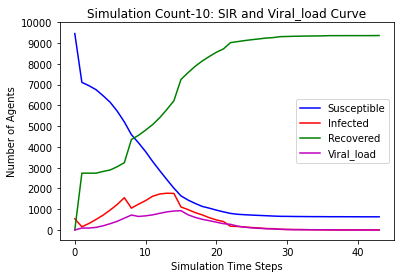

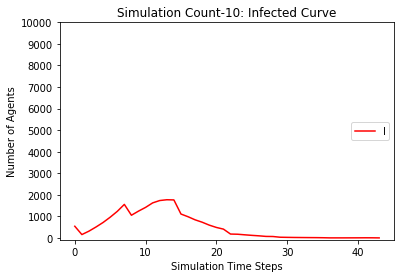

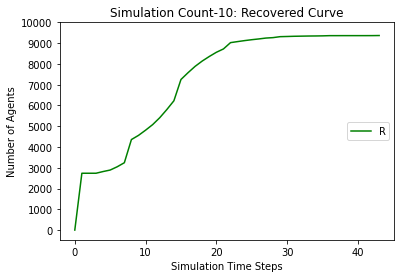

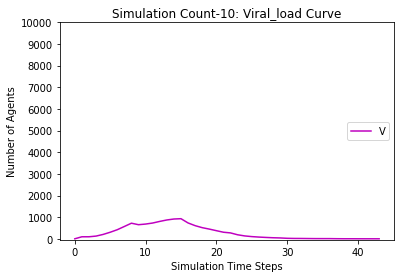

In [10]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  count_timestep=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  num_tests_p=NUM_TESTS
  num_tests_n=NUM_TESTS 
  num_vacs_p=NUM_VACS
  num_vacs_n=NUM_VACS
  Sj,Ij,Rj,ISOLATED_Ij,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj >= 1 :
    Node_p,Node_n,Agent_p,Agent_n,num_tests_n,num_vacs_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1,num_tests_n,num_vacs_n)
    count_timestep=count_timestep+1
    if count_timestep%7 == 0:
      num_tests_n = NUM_TESTS
      #num_vacs_n = NUM_VACS
      #count_timestep=0
    #if num_tests_n < K/100:
    #  num_tests_n = NUM_TESTS
    j+=1 
    Sj,Ij,Rj,ISOLATED_Ij,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  print(num_tests_n)
  print(num_vacs_n)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

Susceptible Average (100 Simulations): [9460, 7123.69140625, 6984.02734375, 6789.765625, 6530, 6211.9140625, 5800.8828125, 5290.62890625, 4692.328125, 4292.7265625, 3876.04296875, 3414.5859375, 2934.078125, 2455.61328125, 2006.53515625, 1597.73828125, 1368.52734375, 1182.3984375, 1038.78125, 914.76953125, 813.0390625, 724.46875, 655.54296875, 619.6796875, 594.53515625, 571.96875, 555.49609375, 545.85546875, 535.19921875, 526.21484375, 521.8125, 518.16796875, 515.5234375, 513.3671875, 509.6875, 506.3671875, 505.30078125]
Infected Average(100 Simulations): [540, 137.32421875, 276.98828125, 471.25, 654.109375, 911.77734375, 1183.14453125, 1499.13671875, 1031.45703125, 1234.6484375, 1406.89453125, 1597.09765625, 1758.25, 1837.11328125, 1869.5078125, 1228.19921875, 1103.08203125, 962.609375, 813.10546875, 682.96875, 555.48828125, 457.9296875, 225.109375, 177.3046875, 143.125, 117.703125, 100.046875, 73.82421875, 59.3359375, 21.05078125, 17.5859375, 17.3046875, 14.046875, 12.84765625, 12.125

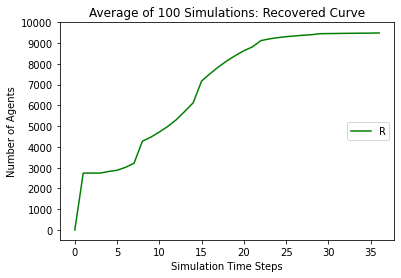

In [11]:
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

print("Susceptible Average (100 Simulations):", SC)
print("Infected Average(100 Simulations):", IC)
print("Recovered Average(100 Simulations):", RC)
print("Viral_load Average(100 Simulations):", VT) 
print("Time Steps:", TC) 



plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))

plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Viral_load"),loc='center right')
plt.show() 



  
